# Práctica 1: Estimación e Inferencia en Modelos de Regresión Lineales

## Modelo 1

Carguemos una base de datos de Woldridge "csal1"

In [226]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from wooldridge import *

dataWoo('ceosal1', description=True) #con description=True tenemos una descripción de las variables
dataWoo('ceosal1')

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


Llamamos "datos" a los datos de esa base de datos, y dentro de tal, notamos por "y" al salario de los CEOS y a "X" la matriz de datos con columna de unos (constante) y "roe" (rendimiento medio del CEO):

In [227]:
datos=dataWoo('ceosal1')

y=datos['salary']
X=sm.add_constant(datos['roe'])

## Estadísticos Descriptivos:

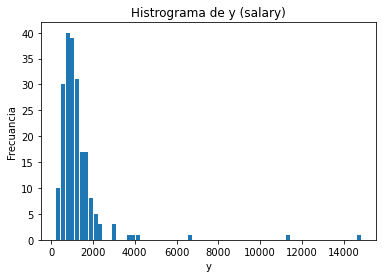

736.0 1039.0 1407.0 1369.0582486088983 1281.1196172248804


In [228]:
media=np.mean(y)
Q1=np.quantile(y, 0.25)
Q3=np.quantile(y, 0.75)
Varianza=np.var(y)
DesviacionTipica=np.std(y)
Mediana=np.median(y)
histograma=plt.hist(y, bins='auto', rwidth=0.85)
plt.xlabel('y')
plt.ylabel('Frecuancia')
plt.title("Histrograma de y (salary)")
plt.show()
print(Q1, Mediana, Q3, DesviacionTipica, np.mean(y))

Ahora ajustamos el modelo $y = X\beta + u$ y extraemos un resumen del resultado:

In [229]:
mco1 = sm.OLS(y, X).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 17 Dec 2021   Prob (F-statistic):             0.0978
Time:                        19:51:56   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Existen otras formas de obtener las estimaciones del modelo:

In [230]:
mco1=smf.ols('salary ~ roe', data=datos).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 17 Dec 2021   Prob (F-statistic):             0.0978
Time:                        19:51:56   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como el modelo solo tiene dos variables ("salary" y "roe") podemos dibujar los datos y la recta de regresión ajustada:

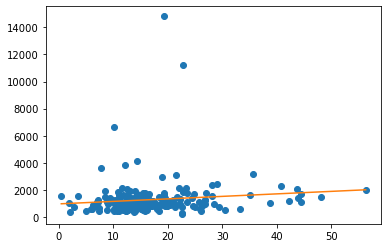

In [231]:
beta=mco1.params #devuelve los elementos de la lista, operator []
plt.plot(datos['roe'], y, 'o')#pinta la nube de puntos, la x sobre la y
xmin=np.min(datos['roe'])
xmax=np.max(datos['roe'])
plt.plot([xmin,xmax], [beta[0]+beta[1]*xmin,beta[0]+beta[1]*xmax])
plt.show()

El modelo obtenido permite realizar algunas gráficas más que nos permitirán validar el modelo:

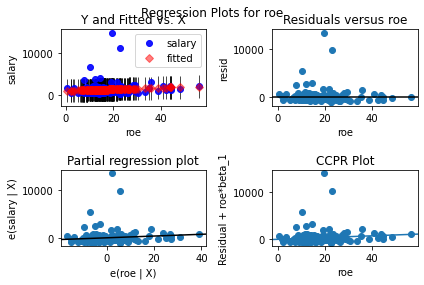

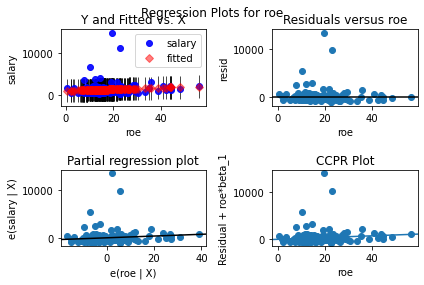

In [232]:
sm.graphics.plot_regress_exog(mco1, 'roe')

Del modelo se pueden extraer otras medidas como:

* Valores predichos $\hat y$
* Residuos



In [233]:
yhat=mco1.fittedvalues
e=mco1.resid
print(e)
np.mean(e)

0     -129.058071
1     -163.854261
2     -275.969216
3     -494.348338
4      149.492288
          ...    
204   -199.702014
205   -724.959725
206   -529.055698
207   -661.657586
208   -603.608413
Length: 209, dtype: float64


-4.85208895921921e-13

* ANOVA

In [234]:
table = sm.stats.anova_lm(mco1, typ=1)
print(table)

             df        sum_sq       mean_sq         F    PR(>F)
roe         1.0  5.166419e+06  5.166419e+06  2.766532  0.097768
Residual  207.0  3.865666e+08  1.867471e+06       NaN       NaN


* Suma de Cuadrados Totales (SCT)

In [235]:
mco1.centered_tss
sum((y-np.mean(y))**2)

391732982.00956935

* Suma de Cuadrados Explicada (SCE)

In [236]:
mco1.ess
sum((mco1.fittedvalues-np.mean(y))**2)

5166419.039866707

* Suma de Cuadrados de los residuos (SCR)

In [237]:
mco1.ssr
sum(e**2)

386566562.9697027

* $R^2$ y $R^2$-ajustado

In [238]:
mco1.rsquared
mco1.rsquared_adj


0.008421419366449578

* Valor $F_{exp}$ y de $F_{teo}$

In [239]:
Fexp=mco1.fvalue
from scipy import stats
alpha=0.05
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(alpha, Fexp, Fteo)
alpha=0.10
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(alpha, Fexp, Fteo)

0.05 2.7665319344658634 3.8867743652252242
0.1 2.7665319344658634 2.7299237376681003


* Valores $t_{exp}$ y $t_{teo}$

In [240]:
texp=mco1.tvalues
print("texp: ", texp)
alpha=0.05
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(alpha)
print(tteo)
alpha=0.10
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(alpha)
print(tteo)

texp:  Intercept    4.516930
roe          1.663289
dtype: float64
0.05
1.9714903918653968
0.1
1.6522480859926563


* Intervalos de confianza de Estimadores

In [241]:
mco1.conf_int()

,0,1
Intercept,542.790219,1383.592454
roe,-3.428196,40.430569


* Estimación de la varianza de la pertrubación:

In [242]:
beta=np.array(mco1.params)

sum(e**2)/(mco1.nobs-1)
sigmagorro=(np.dot(y.values, y.values)-np.dot(beta.T, np.dot(X.values.T,y.values)))/(mco1.nobs-1)

* Predicciones:

In [243]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
epred, lb, ub = wls_prediction_std(mco1, weights=1)

In [244]:
x0=5
beta[0]+beta[1]*x0
X0=sm.add_constant(x0)
mco1.predict(exog=dict(roe=x0))

0    1055.697268
dtype: float64

## Cuestiones

1. Analizar el salario en función de los años de educación utilizando la base de datos **wage1**. Interpretar los coeficientes obtenidos. Dibuja ajustes y residuos.
3. Ajustar el modelo lineal del porcentaje de votos obtenido por el candidato A en base al porcentaje de gastos de campa\~na para tal candidato con la base de datos **vote1**. Comprobar que la media de los residuos es 0 y cómo se relaciona la media de $y$ con respecto a la media de $\hat{y}$.
4. Ajustar el modelo no lineal $\log(wage) = \beta _0 + \beta_1 {\rm educ} + u$ con la base de datos {\bf wage1} e interpretar los resultados obtenidos.
5. Usar la base de datos {\bf 401K} para estudiar la relación entre el porcentage de trabajadores activos que est\'an inscritos en el plan de pensiones (prate) y la tase de contribución al plan (mrate)- cantidad promedio con que la empresa contribuye al plan de cada trabajador  por cada dolar que aporta el trabajador. Seg\'un este modelo, ¿qué prate se predice para mrate=3.5? ? Cu\'anta variación de prate se explica por mrate?
6. Usando la base de datos **charity**:
 * ¿Cuál es el donativo (gift) promedio de esta muestra? ¿Qu\'e porcentage no dio donativo?
 * ¿Cuál es el promedio de envíos por año (mailsyear)?
 * Estimar ${\rm gift} = \beta_0 + \beta_1 {\rm mailsyear} + u$.
 * Si cada envío cuesta un florín, espera la beneficiencia obtener una ganancia neta por cada env\'io?
 * ¿Cu\'al es el menor donativo? Con el modelo de regresi'on, se puede predecir que gift=0?
7. Realiza el siguiente experimento:
 * Generar $500$ observaciones uniformes $[0,10]$. Calcular para esta muestra la media y la desviación t\'ipica: $x$
 * Generar $500$ errores seg\'un una normal $N(0,36)$: $e$. ? Es el promedio de la muestra 0? ¿Cu\'al es su desviación t\'ipica?
 * Ahora generar $y_i = 1 + 2x_i + e_i$ para $i=1, \ldots, 500$.
 * Estimar el modelo $y = \beta_0 + \beta_1 x + u$. Comparar el modelo real con el modelo ajustado.
 * Obtener $\hat{u}$ y probar si $\sum_{i=1}^{500} \hat{u}_i =0$ y que $\sum_{i=1}^{500} x_i \hat{u}_i =0$. ¿Ocurre lo mismo con $u$?
 * Generar de nuevo el modelo y comparar los resultados obtenidos. ¿Son iguales?

### 1. Analizar el salario en función de los años de educación utilizando la base de datos **wage1**. Interpretar los coeficientes obtenidos. Dibuja ajustes y residuos.


In [245]:
datos=dataWoo('wage1', description=False)
Y = datos["wage"]
X = sm.add_constant(datos["educ"])

mco1 = sm.OLS(Y, X).fit()
mco1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           2.78e-22
Time:                        19:51:58   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646
==============================================================================
Omnibus:                      212.554   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.843
Skew:                           1.861   Prob(JB):                    3.79e-176
Kurtosis:                       7.797   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretacion de los coeficientes obtenidos:

Const --> Por cada incremento de su valor implica restarle 0,9 al wage

Educ --> Por cada incremento de su valor incrementa 0,54 el valor de wage

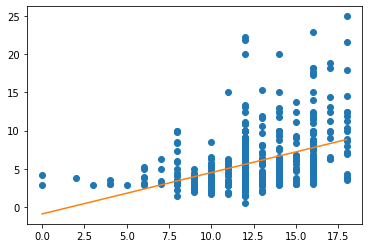

In [246]:
beta=mco1.params

plt.plot(datos['educ'], Y, 'o') # Me muestra todos los puntos

xmin=np.min(datos['educ'])
xmax=np.max(datos['educ'])

# Me muestra la recta
plt.plot([xmin,xmax], [beta[0]+beta[1]*xmin,beta[0]+beta[1]*xmax]) # Primer parametro las X respectivas, y segundo parametro las Y
plt.show()

Media de los residuos:  -6.821750599978148e-16


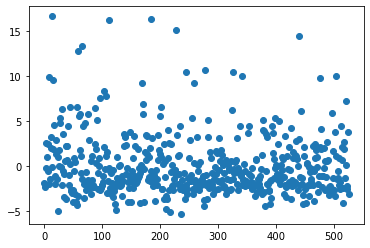

In [247]:
# Grafica de los residuos
e=mco1.resid
plt.plot(e, 'o')
print("Media de los residuos: " , np.mean(e))

### 2. Ajustar el modelo lineal del porcentaje de votos obtenido por el candidato A en base al porcentaje de gastos de campana para tal candidato con la base de datos **vote1**. Comprobar que la media de los residuos es 0 y cómo se relaciona la media de $y$ con respecto a la media de $\hat{y}$.

In [248]:
datos=dataWoo('vote1', description=False)
Y = datos["voteA"]
X = sm.add_constant(datos["lexpendA"])

mco2 = sm.OLS(Y, X).fit()
mco2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     31.64
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           7.44e-08
Time:                        19:51:58   Log-Likelihood:                -718.23
No. Observations:                 173   AIC:                             1440.
Df Residuals:                     171   BIC:                             1447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1712      1.755     24.594      0.000      39.706      46.636
expendA        0.0236      0.004      5.625      0.000       0.015       0.032
==============================================================================
Omnibus:                       57.642   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.030
Skew:                           0.304   Prob(JB):                      0.00244
Kurtosis:                       1.860   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
e=mco2.resid
print("Media de los residuos: " , np.mean(e))
print("Como el valor es muy cercano a 0, es correcto")

Media de los residuos:  -1.2321550331100002e-16
Como el valor es muy cercano a 0, es correcto


In [250]:
print ("La y es: ", np.mean(Y))

y_hat = Y - mco2.resid # Otra forma de sacar y_hat = mco2.predict(X)
print ("La y-gorrito es: ", np.mean(y_hat))
print("Las medias son identicas porque los modelos deben tener que la diferencia entre los residuos debe ser 0")

La y es:  50.50289017341041
La y-gorrito es:  50.502890173410385
Las medias son identicas porque los modelos deben tener que la diferencia entre los residuos debe ser 0


### 3. Ajustar el modelo no lineal $\log(wage) = \beta _0 + \beta_1 {\rm educ} + u$ con la base de datos {\bf wage1} e interpretar los resultados obtenidos.

In [251]:
datos=dataWoo('wage1', description=False)
Y = datos["lwage"]
X = sm.add_constant(datos["educ"])

mco3 = sm.OLS(Y, X).fit()
mco3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.27e-25
Time:                        19:51:59   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
import statsmodels.stats.diagnostic as diagn
import statsmodels.stats.api as sms
from scipy import stats

skip = len(mco3.params)  # bug in linear_harvey_collier
rr = sms.recursive_olsresiduals(mco3, skip=skip, alpha=0.95, order_by=None)

print(stats.ttest_1samp(rr[3][skip:], 0))
print("Es no lineal")

Ttest_1sampResult(statistic=-2.0704130420695304, pvalue=0.03890383061690286)
Es no lineal


### 4. Usar la base de datos {\bf 401K} para estudiar la relación entre el porcentage de trabajadores activos que est\'an inscritos en el plan de pensiones (prate) y la tase de contribución al plan (mrate)- cantidad promedio con que la empresa contribuye al plan de cada trabajador  por cada dolar que aporta el trabajador. Seg\'un este modelo, ¿qué prate se predice para mrate=3.5? ? Cu\'anta variación de prate se explica por mrate?

In [253]:
datos=dataWoo('401K', description=False)

Y = datos["prate"]
X = sm.add_constant(datos["mrate"])

mco4 = sm.OLS(Y, X).fit()
mco4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.10e-27
Time:                        19:51:59   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0755      0.563    147.484      0.000      81.971      84.180
mrate          5.8611      0.527     11.121      0.000       4.827       6.895
==============================================================================
Omnibus:                      394.767   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.172
Skew:                          -1.444   Prob(JB):                    1.11e-189
Kurtosis:                       5.296   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
beta = mco4.params
prediccion = beta[0] + beta[1]*3.5 # Otra forma mco4.predict([1, 3.5])

print("Prediccion para 3.5: ", prediccion)

Prediccion para 3.5:  103.58923260345671


In [255]:
# El mrate explica con un 7.5% el prate y cada variacion de mrate hace que varie en 5.8611 unidades el prate

### 5. Usando la base de datos **charity**:
 * ¿Cuál es el donativo (gift) promedio de esta muestra? ¿Qu\'e porcentage no dio donativo?
 * ¿Cuál es el promedio de envíos por año (mailsyear)?
 * Estimar ${\rm gift} = \beta_0 + \beta_1 {\rm mailsyear} + u$.
 * Si cada envío cuesta un florín, espera la beneficiencia obtener una ganancia neta por cada env\'io?
 * ¿Cu\'al es el menor donativo? Con el modelo de regresi'on, se puede predecir que gift=0?

In [256]:
datos=dataWoo('charity', description=False)

gift = datos["gift"]
media_gift = np.mean(gift)

print("Media de gift: ", media_gift)

respond = datos["respond"]
media_respond = np.mean(respond)

print("La media de no donativos: ", (1 - media_respond) * 100, "%")

mailsyear = sm.add_constant(datos["mailsyear"])
mailsyear_media = np.mean(mailsyear)

print("La media de envios por año: ", mailsyear_media)


Media de gift:  7.444470477975632
La media de no donativos:  60.004686035613865 %
La media de envios por año:  const        1.000000
mailsyear    2.049555
dtype: float64


In [257]:
Y = datos["gift"]
X = sm.add_constant(datos["mailsyear"])

mco5 = sm.OLS(Y, X).fit()

mco5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gift   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     59.65
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.40e-14
Time:                        19:51:59   Log-Likelihood:                -17602.
No. Observations:                4268   AIC:                         3.521e+04
Df Residuals:                    4266   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0141      0.739      2.724      0.006       0.564       3.464
mailsyear      2.6495      0.343      7.723      0.000       1.977       3.322
==============================================================================
Omnibus:                     4951.411   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           784986.187
Skew:                           5.889   Prob(JB):                         0.00
Kurtosis:                      68.387   Cond. No.                         8.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
print("Media de gift: ", media_gift)
mailsyear = datos["mailsyear"]
print("La media de envios por año: ", np.mean(mailsyear))
print("Como el coeficiente de mailsyear es 2.64 por cada incremento de mailsyear, estas produciendo 2.64 gifts por lo que se produciendo un beneficio")

Media de gift:  7.444470477975632
La media de envios por año:  2.0495548266166823
Como el coeficiente de mailsyear es 2.64 por cada incremento de mailsyear, estas produciendo 2.64 gifts por lo que se produciendo un beneficio


In [266]:
donativos = datos[datos["gift"] > 0]

min_donativo = np.min(donativos["gift"])

print("El donativo minimo es: ", min_donativo)
print("Como tenemos un beta constante > 0, y como nuestro beta[1] es mailsyear, es positivo cuando hacemos las predicciones sobre gift siempre va a ser positivo")

El donativo minimo es:  2
Como tenemos un beta constante > 0, y como nuestro beta[1] es mailsyear, es positivo cuando hacemos las predicciones sobre gift siempre va a ser positivo


### 6. Realiza el siguiente experimento:
 * Generar $500$ observaciones uniformes $[0,10]$. Calcular para esta muestra la media y la desviación t\'ipica: $x$
 * Generar $500$ errores seg\'un una normal $N(0,36)$: $e$. ? Es el promedio de la muestra 0? ¿Cu\'al es su desviación t\'ipica?
 * Ahora generar $y_i = 1 + 2x_i + e_i$ para $i=1, \ldots, 500$.
 * Estimar el modelo $y = \beta_0 + \beta_1 x + u$. Comparar el modelo real con el modelo ajustado.
 * Obtener $\hat{u}$ y probar si $\sum_{i=1}^{500} \hat{u}_i =0$ y que $\sum_{i=1}^{500} x_i \hat{u}_i =0$. ¿Ocurre lo mismo con $u$?
 * Generar de nuevo el modelo y comparar los resultados obtenidos. ¿Son iguales?

In [274]:
observaciones1 = np.random.uniform(0, 10, 500)

print("Observaciones 1:")
print("--> Media de las observaciones: ", np.mean(observaciones1))
print("--> Desviacion tipica: ", np.std(observaciones1))

errores1 = np.random.normal(0, 36, 500)

print("Errores 1:")
print("--> Media de los errores: ", np.mean(errores1))
print("--> Desviacion tipica: ", np.std(errores1))

Observaciones 1:
--> Media de las observaciones:  5.0465852825296516
--> Desviacion tipica:  2.808538294327531
Errores 1:
--> Media de los errores:  0.06234525474938073
--> Desviacion tipica:  35.16079287570547


In [276]:
prediccion_observaciones = 1 + 2*observaciones1 + errores1
prediccion_observaciones


array([ 5.28005967e+01,  1.24303550e+01, -2.59345584e+01, -5.69873575e+01,
        2.43090868e+01,  3.67908232e+01, -8.46503011e+00,  5.93270610e+01,
        2.08159478e+01, -5.56467956e+00, -3.89151737e+01,  3.70437144e+01,
        5.72305654e+00,  4.56628687e+01,  3.29176861e+01,  2.67003703e+01,
       -1.26332140e+01,  6.08556225e+01, -1.17164777e+01,  6.04095063e+01,
        1.74238255e+01,  1.90663921e+00,  5.12232093e+01,  1.55715035e+01,
        1.47140562e+01,  1.29623167e+01,  7.24834165e+00, -2.42949220e+01,
        1.72368580e+01,  1.07552710e+01,  9.04149936e+00, -2.77026925e+00,
       -3.35326500e-02,  4.76965265e+01,  2.51042953e+01, -2.58200895e+01,
       -5.59500713e+01,  3.02284415e+01,  1.59287060e+01,  2.76201410e+01,
        6.27902314e+01, -3.52418479e+00,  6.37463510e+01, -5.62929932e+01,
       -8.75852799e+01,  9.70856806e+01,  2.34610942e+01, -4.67665288e+00,
       -3.77267194e+01,  2.91237936e+01, -2.51368341e+00, -2.27753981e+01,
       -1.56425935e+01,  

In [278]:
Y = prediccion_observaciones
X = sm.add_constant(observaciones1)

mco6 = sm.OLS(Y, X).fit()

mco6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.789
Date:                Fri, 17 Dec 2021   Prob (F-statistic):             0.0165
Time:                        20:10:28   Log-Likelihood:                -2488.8
No. Observations:                 500   AIC:                             4982.
Df Residuals:                     498   BIC:                             4990.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3528      3.236      1.345      0.179      -2.004      10.710
x1             1.3480      0.560      2.406      0.016       0.247       2.449
==============================================================================
Omnibus:                        3.065   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                3.062
Skew:                           0.105   Prob(JB):                        0.216
Kurtosis:                       3.320   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No son iguales mi constante es 4.35 != 1, y mi beta[1] es 1.34 != 2

In [287]:
residuos = mco6.resid

sumatoria_residuos = np.sum(residuos)
print("Mi sumatoria de residuos: ", sumatoria_residuos)

sumatoria_residuos_observaciones = np.sum(observaciones1.T * residuos) #observaciones1.T*residuos
print("Mi sumatoria de residuos*x1: ", sumatoria_residuos_observaciones)

Mi sumatoria de residuos:  -5.684341886080801e-13
Mi sumatoria de residuos*x1:  -6.366462912410498e-12


In [288]:
observaciones2 = np.random.uniform(0, 10, 500)

errores2 = np.random.normal(0, 36, 500)

prediccion_observaciones_2 = 1 + 2*observaciones2 + errores2


Y = prediccion_observaciones_2
X = sm.add_constant(observaciones2)

mco6_aux = sm.OLS(Y, X).fit()

mco6_aux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.202
Date:                Fri, 17 Dec 2021   Prob (F-statistic):            0.00752
Time:                        20:17:43   Log-Likelihood:                -2490.4
No. Observations:                 500   AIC:                             4985.
Df Residuals:                     498   BIC:                             4993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5366      3.219      2.652      0.008       2.211      14.862
x1             1.5078      0.562      2.684      0.008       0.404       2.612
==============================================================================
Omnibus:                        0.867   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.922
Skew:                          -0.010   Prob(JB):                        0.631
Kurtosis:                       2.791   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""